In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Работа с данными

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Нет пустых значений, которые нужно заполнять

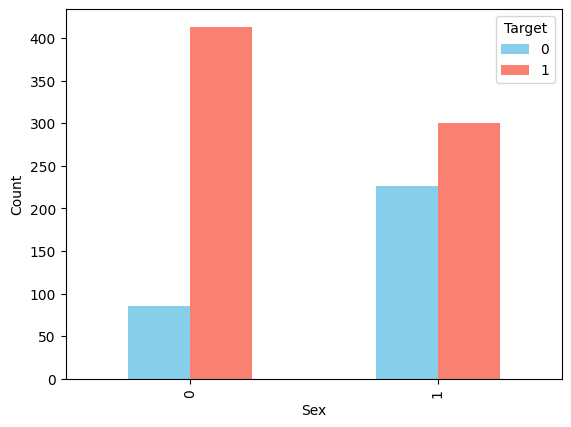

In [5]:
data = pd.DataFrame(data)

sex_target_distribution = data.groupby(['target', 'sex']).size().unstack()
sex_target_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

Судя по графику, мужчины чаще подвержены этой болезни, чем женщины

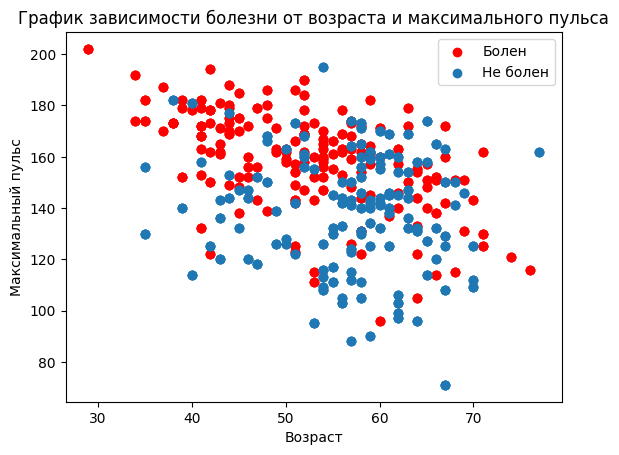

In [6]:
age_disease = data.age[data.target == 1]
thalach_disease = data.thalach[data.target == 1]

age_not_disease = data.age[data.target == 0]
thalach_not_disease = data.thalach[data.target == 0]

# Строим график
plt.scatter(x=age_disease, y=thalach_disease, c="red")
plt.scatter(x=age_not_disease, y=thalach_not_disease)
plt.legend(["Болен", "Не болен"])
plt.xlabel("Возраст")
plt.ylabel("Максимальный пульс")
plt.title("График зависимости болезни от возраста и максимального пульса")
plt.show()

### Нет пропущенных данных, нет колонок с уникальными значениями

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target'>

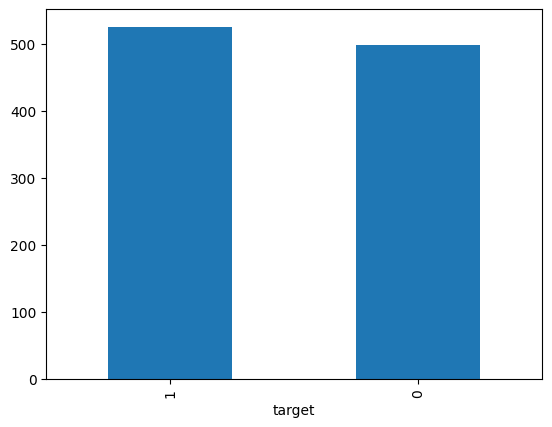

In [8]:
data.target.value_counts().plot.bar()

Распределение целевой переменной 'target' балансированное, что хорошо для задачи классификации.

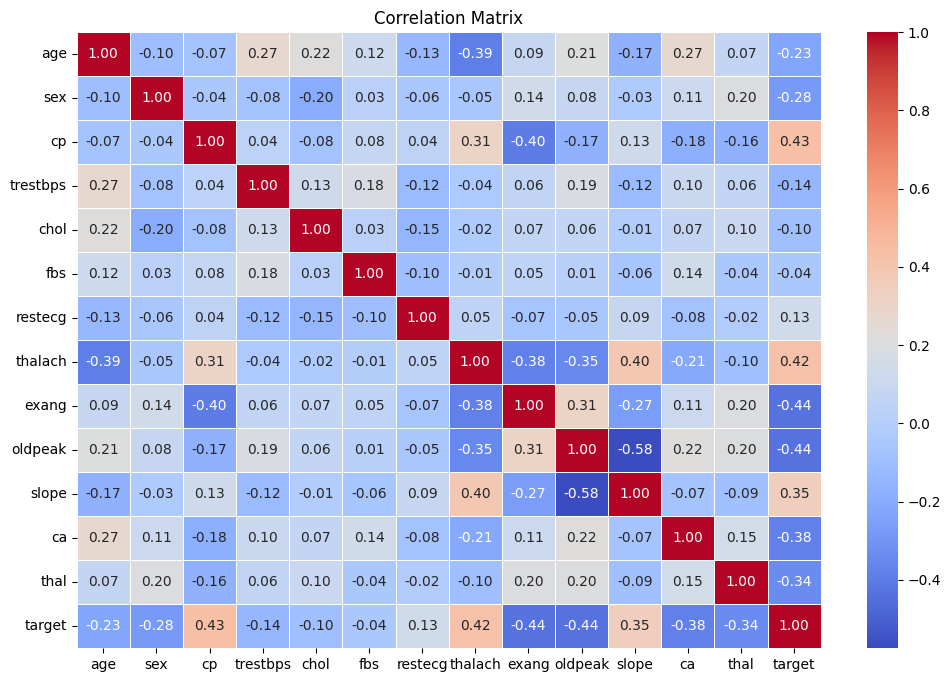

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

target cильно положительно коррелирует с признаками 'cp' (тип боли в груди), 'thalach' (максимальная достигнутая частота сердечных сокращений), 'slope' (наклон сегмента ST при физической нагрузке).
Так же target отрицательно коррелирует с признаками 'thal' (талассемия), 'oldpeak' (депрессия ST, вызванная физической нагрузкой), 'exang' (стенокардия, вызванная физической нагрузкой)

In [10]:
# Закодируем категориальные признаки
cp_dum = pd.get_dummies(data['cp'], prefix = "cp")
thal_dum = pd.get_dummies(data['thal'], prefix = "thal")
slope_dum = pd.get_dummies(data['slope'], prefix = "slope")

data = pd.concat([data, cp_dum, thal_dum, slope_dum], axis = 1)
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False


In [11]:
X = data.drop(["target"], axis=1)
y = data.target

### Реализация и обучение моделей

In [12]:
from collections import Counter
from scipy.spatial import distance
from statistics import mode
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=5):
        # Инициализация KNNClassifier с указанным количеством соседей (k)
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        # Обучение классификатора с использованием предоставленных данных обучения
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_instance in X_test:
            # Вычисление расстояний между тестовым экземпляром и тренировочными данными
            distances = np.linalg.norm(self.X_train - test_instance, axis=1)
            # Нахождение индексов k ближайших соседей
            nearest_indices = np.argsort(distances)[:self.k]
            # Получение меток ближайших соседей
            nearest_labels = self.y_train[nearest_indices]
            # Определение наиболее часто встречающейся метки
            most_common_label = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)
        return predictions
    
    def get_params(self, deep=True):
        return {'k': self.k}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print("Confusion Matrix:")
    print(cm)

In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)
labels = np.unique(y_test)
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Кросс-валидация для настройки гиперпараметра
param_grid = {'k': [1, 3, 5, 7, 9]}  # Подберите подходящие значения
knn = KNNClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Найденные лучшие гиперпараметры
best_k = grid_search.best_params_['k']

# Обучение модели с лучшими гиперпараметрами
best_knn = KNNClassifier(k=best_k)
best_knn.fit(X_train_scaled, y_train)

# Тестирование модели на зарезервированном тестовом наборе
y_test_pred = best_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Точность на тестовом наборе с k={best_k}: {test_accuracy}')

Точность на тестовом наборе с k=1: 0.9707317073170731


In [28]:
plot_confusion_matrix(y_test, y_test_pred, labels)
print("Собственная реализация KNN:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix:
[[102   0]
 [  6  97]]
Собственная реализация KNN:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       102
           1       1.00      0.94      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [29]:
#Логистическая регрессия
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logreg = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
grid_logreg.fit(X_train_scaled, y_train)
best_logreg = grid_logreg.best_estimator_
y_test_pred_logreg = best_logreg.predict(X_test_scaled)

In [30]:
plot_confusion_matrix(y_test, y_test_pred_logreg, labels)
print("Логистическая регрессия:")
print(classification_report(y_test, y_test_pred_logreg))

Confusion Matrix:
[[74 28]
 [16 87]]
Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       102
           1       0.76      0.84      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.78       205
weighted avg       0.79      0.79      0.78       205



In [31]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)
best_svm = grid_svm.best_estimator_
y_test_pred_svm = best_svm.predict(X_test_scaled)

In [32]:
plot_confusion_matrix(y_test, y_test_pred_svm, labels)
print("SVM Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

Confusion Matrix:
[[102   0]
 [  3 100]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [33]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_
y_test_pred_knn = best_knn.predict(X_test_scaled)

In [34]:
plot_confusion_matrix(y_test, y_test_pred_knn, labels)
print("KNN Classification Report:")
print(classification_report(y_test, y_test_pred_knn))

Confusion Matrix:
[[102   0]
 [  6  97]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       102
           1       1.00      0.94      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [35]:
#Наивный Байес
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_test_pred_nb = nb.predict(X_test_scaled)

In [36]:
plot_confusion_matrix(y_test, y_test_pred_nb, labels)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_test_pred_nb))

Confusion Matrix:
[[45 57]
 [ 5 98]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59       102
           1       0.63      0.95      0.76       103

    accuracy                           0.70       205
   macro avg       0.77      0.70      0.68       205
weighted avg       0.77      0.70      0.68       205



In [37]:
#Решающее дерево
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 10, 20, 30, 40]}
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
grid_dt.fit(X_train_scaled, y_train)
best_dt = grid_dt.best_estimator_
y_test_pred_dt = best_dt.predict(X_test_scaled)

In [38]:
plot_confusion_matrix(y_test, y_test_pred_dt, labels)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

Confusion Matrix:
[[102   0]
 [  3 100]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



SVM и KNN показывают наилучшую производительность с высокой точностью, полнотой и F1-мерой.
Логистическая регрессия и наивный Байес предоставляют приемлемые результаты, но с небольшими различиями в точности и полноте.
Решающее дерево также демонстрирует высокую производительность, сравнимую с SVM и KNия.

Собственная реализация решающего дерева демонстрирует высокую производительность, сравнимую с библиотечной реализацией, достигая высокой точности, полноты и F1-меры для обоих классов